<a href="https://colab.research.google.com/github/BaruchMM/Relatividad-general-y-Cosmologia/blob/main/Problema_de_Kepler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema de Kepler

> En mecánica clásica, el problema de Kepler es un caso especial del problema de los dos cuerpos, en el que los dos cuerpos interactúan por medio de una fuerza central que varía en intensidad según una ley cuadrática inversamente proporcional en función de la distancia entre ambos.

Primero cargamos los paquetes necesarios.

In [ ]:
import matplotlib.animation as animation 
import matplotlib.pyplot as plt 
import pylab as pl
import numpy as np 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wd
import matplotlib.gridspec as gridspec
from scipy.integrate import odeint

## Teoría
Partiendo de la ecuación diferencial radial
 $$ \mu\ddot{\rho}-\dfrac{\ell^2}{\mu\rho^3}=-\dfrac{k}{\rho^2} $$


 donde $k=-GMm$, $G$ es la constante de gravitación universal y $\ell=\mu \rho^2 \dfrac{d\theta}{dt}$ es el momento angular. Si $\ell$ es diferente de cero, entonces podemos cambiar la dependencia de $\rho \rightarrow \theta$
$$\dfrac{d\rho}{dt}= \dot{\theta} \dfrac{d\rho}{d\theta}= \dfrac{\ell}{\mu \rho^2}\dfrac{d\rho}{d\theta}$$

además definiendo u=1/ρ y aplicando lo anterior, podemos reescribir nuestra ecuación diferencial de la siguiente manera.

$$\dfrac{d^2u}{d\theta^2}+u=k\dfrac{\mu}{\ell^2}$$


Para eliminar las dimensiones, definimos 
$ u=\hat{u}L^{-1}$ $\Rightarrow$ $\dfrac{d^2u}{d\theta^2}=\dfrac{d^2\hat{u}}{d\theta^2}L^{-1}$
donde û es adimencional y L^-1 tiene dimensiones de longitud$^{-1}$.

Obtenemos la ecuación diferencial 
$$\dfrac{d^2\hat{u}}{d\theta^2}+\hat{u}=L\dfrac{k\mu}{\ell^2}$$

Y si definimos que 
$ L\dfrac{k\mu}{\ell^2}=1$, finalmente obtenemos la ecuación diferencial
$$\dfrac{d^2\hat{u}}{d\theta^2}+\hat{u}=1 $$




La cual tiene como solución 
$$\hat{u}_{(\theta)}= A\sin(\theta)+B\cos(\theta)+1$$
$$\hat{u}'_{(\theta)}= A\cos(\theta)-B\sin(\theta)$$

Ya que $ \hat{u}=\dfrac{1}{\hat{\rho}} $, entonces para $\hat{\rho}$ se tiene la solución 
$$\hat{\rho}=\dfrac{1}{A\sin(\theta)+B\cos(\theta)+1} $$
$$\hat{\rho}'=\dfrac{B\sin(\theta)-A\cos(\theta)}{(A\sin(\theta)+B\cos(\theta)+1)^2} $$

Para obtener las constantes, utilizamos una condición inicial en la que $\theta=0$, entonces

$$\hat{\rho}_{(\theta=0)}=\dfrac{1}{B+1}$$

Y por otra parte, se tendrá que para $\theta=0$, en $\hat{\rho}'$ se tendrá la $$\hat{\rho}'_{(\theta=0)}=\dfrac{-A}{B+1}=0 \phantom{aa}\Rightarrow \phantom{aa} A=0$$

Esta solución nos describe curvas cónicas, de manera que se renombrará la cosntante B como e, siendo esta la excentricidad.
$$\hat{\rho}=\dfrac{1}{e \cos(\theta)+1}$$
$$\hat{\rho}'=\dfrac{e \sin(\theta)}{(e \cos(\theta)+1)^2} $$
Se obtienen las diferentes cónicas con los siguientes valores de la excentricidad:
 $$e=0 \phantom{aaa} circunferencia $$
 $$0<e<1 \phantom{aa} elipse$$
$$e=1 \phantom{aaa} parábola$$
$$1<e \phantom{aaa} hipérbola$$

## Desarrollo numérico
Lo escribimos en código

In [ ]:
def solA(theta,B):
  rho=1/(B*np.cos(theta)+1)
  return rho

Para visualizar diferentes casos con valores de $e \in [0,2]$, se realizó el siguiente codigo que utiliza la solución para $\hat{\rho}$ y su primera derivada para obtener las siguientes gráficas:

Se definen 200 valores de theta entre -2pi y 2pi

In [ ]:
theta=np.linspace(-2*np.pi,2*np.pi,200)

También resolvemos la ecuación diferencial numéricamente. Lo definimos como un sistema de ecuaciones.


In [ ]:
def model(z,t):
  y1 = z[0]
  y2 = z[1]
  dy1dt = y2
  dy2dt = 1.-y1
  dzdt = [dy1dt,dy2dt]
  return dzdt

### Trayectorias sin dimensiones 
Para diferentes valores de B, se obtienen diferentes cónicas. Graficando estas trayectorias con un valor paramétrico de B en un intervalo $[0,2]$, se utilizó la función $interact$ y pasando de coordenadas polares a cartesianas con si $x=\hat{\rho} \cos(\theta)$ y $y=\hat{\rho} \sin(\theta)$, se obtiene la siguiente gráfica interactiva

In [ ]:
def plotFunction1 (e):

    plt.figure(figsize=(11,6))
    rho=solA(theta,e)
    zz=1+e
    z0 = [zz,0.]
    z = odeint(model,z0,theta)
    limits = [ -2, 2, -2, 2]

    plt.axis(limits)
    plt.plot(rho*np.cos(theta),rho*np.sin(theta),'b-',label=r'Solución analítica')

    plt.plot(np.cos(theta)/(z[:,0]),np.sin(theta)/(z[:,0]),'g:',label=r'Solución numérica')
    plt.plot(0,0,marker="o", color="orange")
    plt.title('Trayectoria en cartecianas para solución sin dimensiones $( L\dfrac{km^2}{\ell}=1 )$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid()
    plt.show()
interact(plotFunction1,e=(0,2,0.001))

interactive(children=(FloatSlider(value=1.0, description='e', max=2.0, step=0.001), Output()), _dom_classes=('…

<function __main__.plotFunction1>

Nótese que $x$, $y$ son adimensionales cuando $( L\dfrac{km^2}{\ell}=1 )$.

Calculando el momento angular adimensional. Sea $ \ell=\mu\rho^2 \dot{\theta} =\mu L^2\hat{\rho}^2 \dot{\theta}$ entonces $ \ell= \hat{\ell} L^2$
Ya que $L\dfrac{km^2}{\ell}=1$, finalmente 
 $$ \hat{\ell}=\dfrac{km^2}{L} $$

### Espacio fase de sin dimensiones
Sea el momento 
$$ P=\dfrac{\partial \mathcal{L}}{d\dot{q}_\rho}=\mu\dot{\rho}$$
Cambiando la dependencia de $t$ a $\theta$, se obtiene que 
$$ P=\mu \frac{d\rho}{d\theta}\frac{d\theta}{dt}=\mu \rho'\frac{\ell}{\mu \rho^2} =\dfrac{\rho'}{\rho^2}\ell$$

Usando la definicion de $\ell= \hat{\ell} L^2$ y se define $C=\dfrac{\hat{\ell}}{L}$, entonces el momento adimensional $\hat{P}$ será
$$ \hat{P}=C \dfrac{\hat{\rho}'}{\hat{\rho}^2} $$

In [ ]:
def plotFunction2 (B):
    rho=1/(B*np.cos(theta)+1)
    rhop=(B*np.sin(theta))/(B*np.cos(theta)+1)**2
    
    plt.figure(figsize=(9,7))
    plt.plot(rho,rhop/(rho**2))
    pl.yticks([-1.5,-1.0,-0.5, 0, 0.5, 1.0,1.5],[ '$-1.5C$', '$-1.0C$', '$-0.5C$', '$0.0C$','$0.5C$', '$1.0C$', '$1.5C$'])
    plt.title('Espacio fase de ρ sin dimensiones $( L\dfrac{km^2}{\ell}=1 )$')

    plt.xlabel('$\hat{ρ}$')
    plt.ylabel('$\hat{P}$')
    plt.grid()
    plt.show()
interact(plotFunction2,B=(0,2,0.001))

interactive(children=(FloatSlider(value=1.0, description='B', max=2.0, step=0.001), Output()), _dom_classes=('…

<function __main__.plotFunction2>

Recordando que $u=1/r$, se puede definir un plano fase de la solución de la ecuación diferencial 
$$\dfrac{d^2\hat{u}}{d\theta^2}+\hat{u}=1 $$

La cual tiene como solución 
$$\hat{u}_{(\theta)}= e \cos(\theta)+1$$
$$\hat{u}'_{(\theta)}= -e \sin(\theta)$$
se tiene el diagrama fase siguiente

In [ ]:
def plotFunction2 (e):
    B=e
    u=(B*np.cos(theta)+1)
    up=-B*np.sin(theta)
    
    plt.figure(figsize=(8,8))
    plt.plot(u,up)
    plt.title('Espacio fase de $\hat{u}$ sin dimensiones $( L\dfrac{km^2}{\ell}=1 )$ \n para diferentes valores de la excenticidad (B)')
    plt.xlabel('$u$')
    plt.ylabel('$û$')
    plt.grid()
    plt.show()
interact(plotFunction2,e=(0,5,0.05))

interactive(children=(FloatSlider(value=2.0, description='e', max=5.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.plotFunction2>

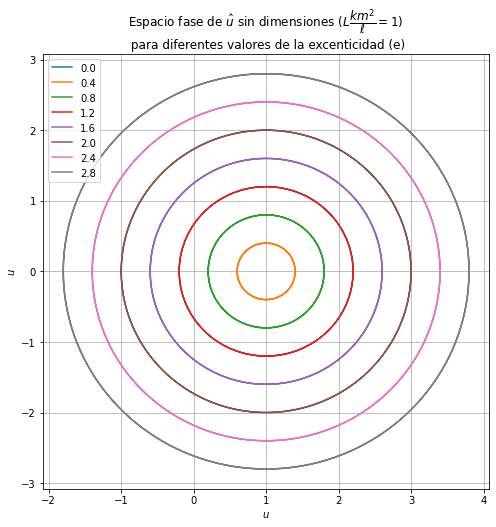

In [ ]:
B=[0.0,0.4,0.8,1.2,1.6,2.0,2.4,2.8]
label=['0.0','0.4','0.8','1.2','1.6','2.0','2.4','2.8']
plt.figure(figsize=(8,8))

for i in range (0,8):
  u=(B[i]*np.cos(theta)+1)
  up=-B[i]*np.sin(theta)
  plt.plot(u,up,label=label[i])

plt.title('Espacio fase de $\hat{u}$ sin dimensiones $( L\dfrac{km^2}{\ell}=1 )$ \n para diferentes valores de la excenticidad (e)')
plt.xlabel('$u$')
plt.ylabel('$u$')
plt.legend()
plt.grid()
plt.show()

## $\hat{\rho}$ en función del ángulo $\theta$

Esto nos permite hacer una comparación punto a punto de la solución analítica y la numérica.
Definimos la solución semianalítica como $\rho$ y la numérica como $\tilde{\rho}$. Entonces tenemos un error relativo de la siguiente manera:

$$\dfrac{\Delta \rho}{\rho}=\dfrac{\tilde{\rho}-\rho}{\rho}$$

La línea sólida es la solución semianalítica y la rayada es la solución numérica.

In [ ]:
def plotFunction3 (e):
    rho=solA(theta,e)
    zz=(1+e)
    z0 = [zz,0.]

    fig,(ax1,ax2)=plt.subplots(2,1,figsize=(11,8))
    gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
    ax1=plt.subplot(gs[0])
###
  #Solución semianalítica
    rho=solA(theta,e)
  #Solución numérica
    z = odeint(model,z0,theta)
    ax1.plot(theta, rho)
    ax1.plot(theta, 1/z[:,0], '--')
    plt.grid()
    ax2 = plt.subplot(gs[1], sharex = ax1)
    ax2.plot(theta,100*((-rho+1/z[:,0])/rho),lw=2)
    plt.grid()
    ax1.set_ylabel(r'$\rho$')
    ax2.set_xlabel(r'$\theta$')
    ax2.set_ylabel(r'$\Delta\rho/\rho (\%) $')
    plt.setp(ax1.get_xticklabels(), visible=False)
    plt.subplots_adjust(hspace=.0)
interact(plotFunction3,e=(0,2,0.0001))

interactive(children=(FloatSlider(value=1.0, description='e', max=2.0, step=0.0001), Output()), _dom_classes=(…

<function __main__.plotFunction3>

# Órbita de la tierra alrededor del sol

Para obtener las órbitas 

### Calculando la excentricidad

Partiendo de la solución de la EDO en $\phi=0$
$$\hat{u}=1+e \cos({\phi}) \Rightarrow e=\hat{u}_0 -1$$
Para el caso de la tierra, se sabe que su distancia menor entre el sol y ella (perihelio) es de $r=0.98 $UA. Para obtener $\hat{u}_0$ es necesario calcular $\hat{u}_0=\dfrac{L}{r_0}$ donde $L=\dfrac{\ell^2}{k\mu}$.
El momento angular de la tierra alrededor del sol es de $\ell=2.657\times10^{40}kg\frac{m^2}{s}=1.187\times10^{18}kg\frac{UA^2}{s}$. Es necesario hacer la conversión de unidades del momento angular, la constante de gravitación y el radio antes de quitar las unidades.

In [ ]:
#Masa mayor en Masa Solares 
#Masa del Sol M = 1.989*(10**30) = 1 MS
M = 1*1.989*(10**30)   # Masa mayor
#Masa menor en kilogramos
#Masa de la Tierra m = 5.972*(10**24)   3.0025138260432377*10**-6
m = 5.972*(10**24)   # Masa menor
#Distancia mínima entre ambos cuerpos
#La distancia media entre la Tierra y el Sol es r = 149597828680 m = 1 UA 149597828680
r = 0.98  #Distancia mínima entre ambos cuerpos

#Momento angular 'l' en unidades (kg*m^2)/s
l=(2.657*10**40)*(1/(149597828680**2)) # Momento angular
G=(6.674*(10**-11))*(1/(149597828680**3))
mu=(m*M)/(m+M)
k=M*m*G
L=(l**2)/(k*mu)

#e es la excentricidad 
e=-(1-L/r)

### Trayectoria

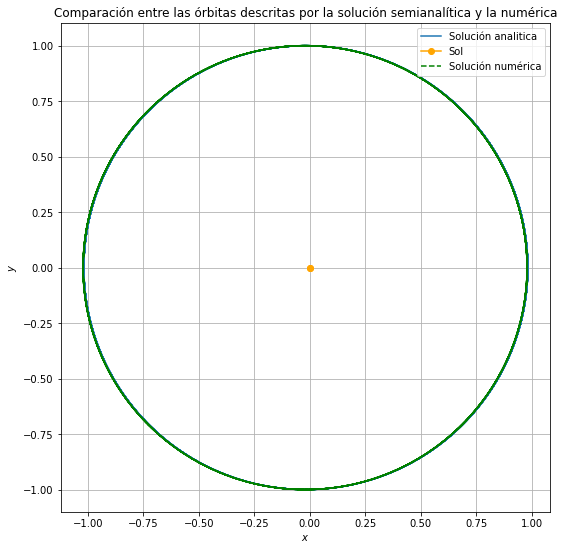

In [ ]:
theta = np.linspace(0,15*np.pi,1000)

  #Condiciones iniciales
    #radio en phi=0
r=0.98
z0 = [1/r,0.]

  #Solución semianalítica
u=1+e*np.cos(theta)
rho=1/u
x=rho*np.cos(theta)
y=rho*np.sin(theta)
plt.figure(figsize=(9,9))
plt.plot(x,y,label=r'Solución analitica')
plt.plot(0,0,marker="o", color="orange",label='Sol')


  #Solución numérica
    # Función que regresa el sistema de ecuaciones diferenciales
def model(z,t):
    y1 = z[0]
    y2 = z[1]
    dy1dt = y2
    dy2dt = 1.-y1
    dzdt = [dy1dt,dy2dt]
    return dzdt

    # Función para resolver las ecuaciones diferenciales ordinarias con las condiciones iniciales z0
z = odeint(model,z0,theta)
plt.plot(np.cos(theta)/(z[:,0]),np.sin(theta)/(z[:,0]),'g--',label=r'Solución numérica')
    

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
    #plt.axhline(y=0.,color='k')
    #plt.axvline(x=ti,color='k')
plt.plot(0,0,marker="o", color="orange")
plt.legend()
plt.grid()
plt.title('Comparación entre las órbitas descritas por la solución semianalítica y la numérica')
plt.axis('square')
plt.show()

En la gráfica anterior se muestra que la órbita calculada numéricamente es la misma que la descrita por la solución analítica

### Espacio fase

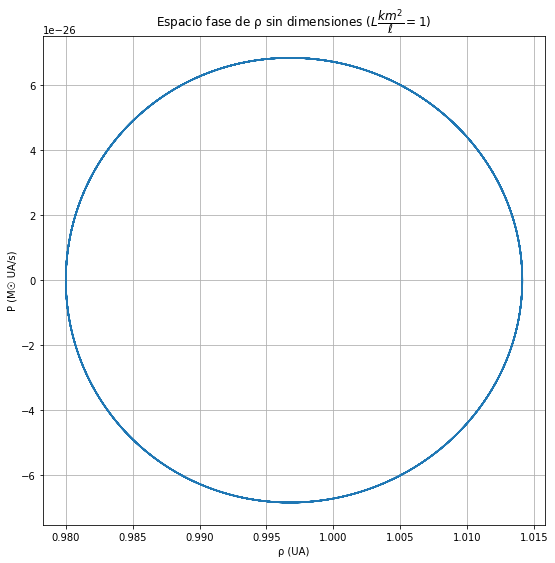

In [ ]:
rho=1/u
rhop=((B*np.sin(theta))/(B*np.cos(theta)+1)**2)
P=((l)/((L*rho)**2)*(L*rhop))*(1/((149597828680)*(1.989*(10**30))))
plt.figure(figsize=(9,9))
plt.plot(L*rho,P)
plt.title('Espacio fase de ρ sin dimensiones $( L\dfrac{km^2}{\ell}=1 )$')
plt.xlabel('ρ (UA)')
plt.ylabel('P (M☉ UA/s)')
plt.grid()
plt.show()


### Distancia entre ambos cuerpos

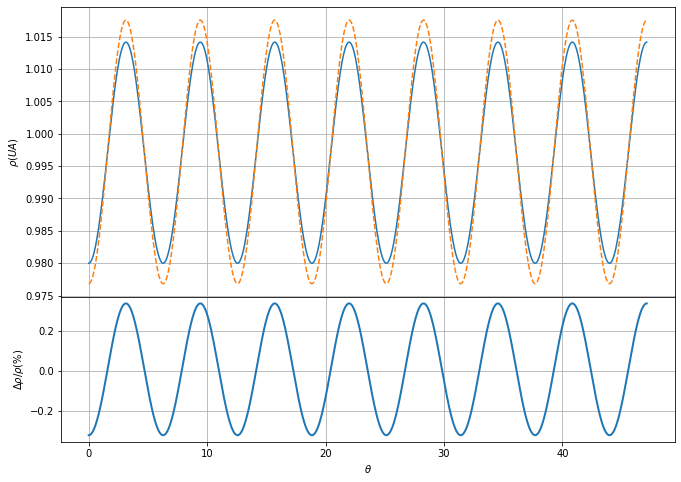

In [ ]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(11,8))
gs=gridspec.GridSpec(2,1, height_ratios=[2,1])
ax1=plt.subplot(gs[0])
###
ax1.plot(theta, L*rho)
ax1.plot(theta, L/z[:,0], '--')
plt.grid()
ax2 = plt.subplot(gs[1], sharex = ax1)
ax2.plot(theta,100*((-rho+1/z[:,0])/rho),lw=2)
plt.grid()
ax1.set_ylabel(r'$\rho (UA)$')
ax2.set_xlabel(r'$\theta$')
ax2.set_ylabel(r'$\Delta\rho/\rho (\%) $')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)